# Introduction
We are working with a dataset that contains information about Airbnb listings in the US. Our goal is to predict the price of a stay in these listings. The dataset consists of 74411 listings and 29 columns. One of the columns, log_price, is the target variable that we are trying to predict

# 6 ve 7 nci kısımlar yapıldıkça güncellenecek!

<font color = 'yellow'>
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#12)
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Survived -- Age](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing: Age Feature](#20)
1. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
1. [Modeling](#29)
    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32) 
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

1. <a id = "1"></a><br>
# Load and Check Data

In [3]:
cwd = os.getcwd()  # your current working directory (cwd)
files = os.listdir(cwd)  # This will Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\info_tech_dersler\\ml_prj_airbnb\\ML_Project_Group_B': ['.git', 'Column_Descriptions.xlsx', 'Feature_Engineering.ipynb', 'Main.ipynb', 'Missing_Values.ipynb', 'Outliers.ipynb', 'README.md', 'train.csv', 'Visualization.ipynb']


In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [6]:
pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)

In [7]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [8]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


<a id = "2"></a><br>
# Variable Description
# Yazılacak!!!
1. Id: 

2. log_price:0,.....7,6         0....4,78....7,6  (min,mean,max)

3. property_type: Apartment, House, Condominium, Loft, Townhouse, Hostel, Guest suite, Bed & Breakfast, Bungalow, Guesthouse, Dorm, Other, Camper/RV, Villa, Boutique hotel, Timeshare, In-law, Boat, Serviced apartment, Castle, Cabin, Treehouse, Tipi, Vacation home, Tent, Hut, Casa particular, Chalet, Yurt, Earth House, Parking Space, Train, Cave, Lighthouse, Island
4. room_type: Entire home/apt, Private room, Shared room

5. amenities:   TV Cable_TV Wireless_Internet Air_conditioning Kitchen Breakfast Buzzer_wireless_intercom Heating Family_kid_friendly Smoke_detector Carbon_monoxide_detector Fire_extinguisher Essentials Shampoo Hangers Hair_dryer Iron Laptop_friendly_workspace translation_missing__en_hosting_amenity_50

6. accommodates:1,2,3.....16             1...3,15....16  (min,mean,max)

7. bathrooms:0,1,2,....8       1....1,23....8 (min,mean,max)

8. bed_type:   Real Bed, Futon, Pull-out Sofa, Couch, Airbed 

9. cancellation_policy: strict, moderate, flexible, super_strict_30, super_strict_60

10. cleaning_fee:True, False

11. city:  NYC, SF, DC, LA, Chicago, Boston  

12. description:

13. first_review:  date

14. host_has_profile_pic:   t, nan, f

15. host_identity_verified:  t, nan, f

16. host_response_rate:nan, 100%, 71%, 68%, 67%, 83%, 50%, 90%, 86%, 92%, 82%, 80%, 89%, 93%, 99%, 0%, 88%, 96%, 70%, 94%, 91%, 25%, 95%, 98%, 62%, 29%, 33%, 81%, 63%, 38%, 60%, 79%, 78%, 75%, 65%, 97%, 87%, 40%, 54%, 53%, 58%, 76%, 30%, 64%, 17%, 20%, 77%, 73%, 41%, 59%, 57%, 85%, 56%, 42%, 44%, 35%, 14%, 74%, 27%, 10%, 84%, 6%, 72%, 36%, 55%, 43%, 13%, 39%, 46%, 26%, 61%, 52%, 23%, 22%, 69%, 66%, 15%, 11%, 31%, 21%, 47%

17. host_since: date

18. instant_bookable:  f, t

19. last_review: date

20. latitude: enlem

21. longitude:  boylam

22. name:

23. neighbourhood: mahalle

24. number_of_reviews: toplam inceleme sayisi             0,..20,05...605(min,mean,max)

25. review_scores_rating:    degerlendirme/oylama puani   20...94,06..100 (min,mean,max)

26. thumbnail_url:   photos

27. zipcode:  post kod

28. bedrooms: 0,1,2,3,.....,10

29. beds: 0,1,2,3,...18

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

* bool(1): 'cleaning_fee'
* int64(3): 'id', 'accommodates', 'number_of_reviews'
* float64(7): 'log_price', 'bathrooms', 'latitude', 'longitude','review_scores_rating', 'bedrooms', 'beds'
* object(18): 'property_type', 'room_type', 'amenities', 'bed_type','cancellation_policy', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate','host_since', 'instant_bookable', 'last_review', 'name',
       'neighbourhood', 'thumbnail_url', 'zipcode'


In [10]:
pd.set_option('display.max_colwidth', 0)
df[['property_type','room_type','bed_type','cancellation_policy',
      'cleaning_fee','city','host_has_profile_pic','host_identity_verified',
     'host_response_rate','instant_bookable','neighbourhood']].agg(['unique']).transpose()

,unique
property_type,"[Apartment, House, Condominium, Loft, Townhouse, Hostel, Guest suite, Bed & Breakfast, Bungalow, Guesthouse, Dorm, Other, Camper/RV, Villa, Boutique hotel, Timeshare, In-law, Boat, Serviced apartment, Castle, Cabin, Treehouse, Tipi, Vacation home, Tent, Hut, Casa particular, Chalet, Yurt, Earth House, Parking Space, Train, Cave, Lighthouse, Island]"
room_type,"[Entire home/apt, Private room, Shared room]"
bed_type,"[Real Bed, Futon, Pull-out Sofa, Couch, Airbed]"
cancellation_policy,"[strict, moderate, flexible, super_strict_30, super_strict_60]"
cleaning_fee,"[True, False]"
city,"[NYC, SF, DC, LA, Chicago, Boston]"
host_has_profile_pic,"[t, nan, f]"
host_identity_verified,"[t, f, nan]"
host_response_rate,"[nan, 100%, 71%, 68%, 67%, 83%, 50%, 90%, 86%, 92%, 82%, 80%, 89%, 93%, 99%, 0%, 88%, 96%, 70%, 94%, 91%, 25%, 95%, 98%, 62%, 29%, 33%, 81%, 63%, 38%, 60%, 79%, 78%, 75%, 65%, 97%, 87%, 40%, 54%, 53%, 58%, 76%, 30%, 64%, 17%, 20%, 77%, 73%, 41%, 59%, 57%, 85%, 56%, 42%, 44%, 35%, 14%, 74%, 27%, 10%, 84%, 6%, 72%, 36%, 55%, 43%, 13%, 39%, 46%, 26%, 61%, 52%, 23%, 22%, 69%, 66%, 15%, 11%, 31%, 21%, 47%]"
instant_bookable,"[f, t]"


In [11]:
#check colums  with values
index= ["host_response_rate","property_type", "room_type","accommodates","bathrooms","bed_type", "cancellation_policy", "cleaning_fee",
       "city","instant_bookable", "beds", "bedrooms", "neighbourhood","first_review", "last_review","zipcode",
       "name","host_since","thumbnail_url", "latitude", "longitude", 
        "host_has_profile_pic", "host_identity_verified"]

for i in index:
    
    print(df[i].value_counts(), "\n")
    print("---------------------------------------------------------------")

host_response_rate
100%    43254
90%     2277 
80%     1113 
0%      883  
50%     611  
70%     508  
99%     448  
67%     433  
98%     425  
94%     401  
97%     400  
96%     350  
60%     337  
95%     322  
88%     316  
75%     315  
92%     315  
89%     310  
93%     307  
83%     279  
86%     243  
91%     224  
33%     142  
40%     120  
78%     116  
71%     106  
87%     90   
81%     88   
82%     82   
25%     80   
68%     71   
85%     62   
84%     62   
63%     58   
57%     57   
73%     49   
79%     45   
20%     45   
56%     44   
30%     38   
76%     29   
74%     24   
77%     24   
64%     23   
43%     22   
54%     21   
44%     19   
29%     18   
58%     17   
10%     16   
65%     15   
72%     15   
17%     15   
38%     15   
53%     14   
55%     13   
69%     12   
46%     8    
62%     7    
14%     6    
52%     5    
36%     5    
35%     5    
42%     5    
59%     4    
61%     4    
66%     3    
22%     3    
26%     3    
11%     2    
4

bed_type
Real Bed         72028
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: count, dtype: int64    real bed ve digerleri.....

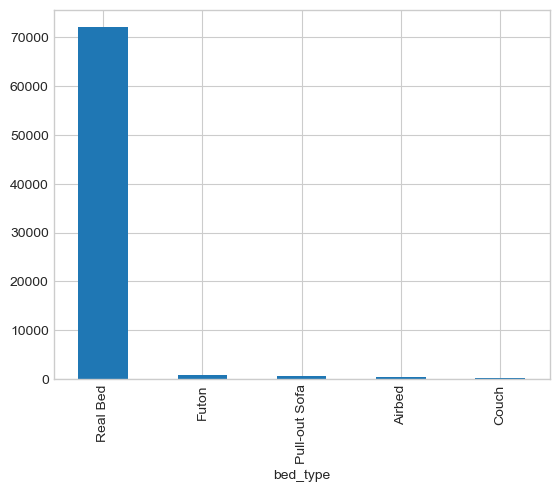

In [13]:
df['bed_type'].value_counts().sort_values(ascending=False).plot(kind='bar');